In [1]:
import dataset
from importlib import reload
import skimage
import numpy as np

D:\Github\smlm-dl\smlm_dl\dataset.py:222: RuntimeWarning: divide by zero encountered in log
  im = axes[1].imshow(np.log(tiled_images))


1:	 [id = 1.000,], [x = 6.783,], [y = 3.473,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 606.273,], [bg = 83.538,],
6:	 [id = 6.000,], [x = 1.072,], [y = 10.198,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1511.507,], [bg = 16.002,],
4:	 [id = 4.000,], [x = 2.127,], [y = -1.747,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1939.170,], [bg = 11.247,],
12:	 [id = 12.000,], [x = -9.573,], [y = 1.490,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 606.568,], [bg = 46.051,],
10:	 [id = 10.000,], [x = -0.875,], [y = 2.403,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1119.919,], [bg = 68.936,],
9:	 [id = 9.000,], [x = 3.749,], [y = 4.205,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 689.807,], [bg = 65.906,],
11:	 [id = 11.000,], [x = -6.727,], [y = 0.662,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1274.868,], [bg = 32.337,],
8:	 [id = 8.000,], [x = 6.447,], [y = 3.535,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1114.256,], [bg = 21.899,],


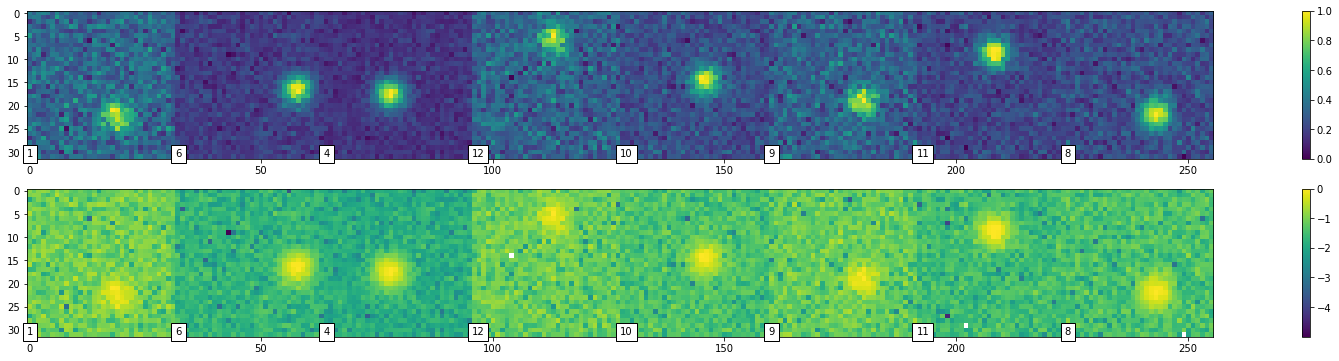

In [2]:
reload(dataset)
a = dataset.Gaussian2DPSFDataset(length=16,)# augmentations={})
dataset.inspect_images(a)

D:\Github\smlm-dl\smlm_dl\dataset.py:222: RuntimeWarning: invalid value encountered in log
  im = axes[1].imshow(np.log(tiled_images))


11:	 [id = 11.000,], [x = 0.182,], [y = -1.729,], [A = 1743.722,], [bg = 17.895,],
6:	 [id = 6.000,], [x = 5.987,], [y = 9.603,], [A = 1614.291,], [bg = 51.115,],
9:	 [id = 9.000,], [x = -4.759,], [y = -7.078,], [A = 918.701,], [bg = 65.208,],
15:	 [id = 15.000,], [x = -0.708,], [y = -5.848,], [A = 972.644,], [bg = 83.289,],
0:	 [id = 0.000,], [x = 6.762,], [y = -9.604,], [A = 686.848,], [bg = 3.169,],
5:	 [id = 5.000,], [x = -0.969,], [y = -4.507,], [A = 1997.710,], [bg = 25.469,],
10:	 [id = 10.000,], [x = -0.301,], [y = -4.438,], [A = 1389.377,], [bg = 60.120,],
1:	 [id = 1.000,], [x = -2.226,], [y = 3.694,], [A = 1318.807,], [bg = 44.567,],


D:\Github\smlm-dl\smlm_dl\zernike.py:84: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(-y_lim, y_lim)


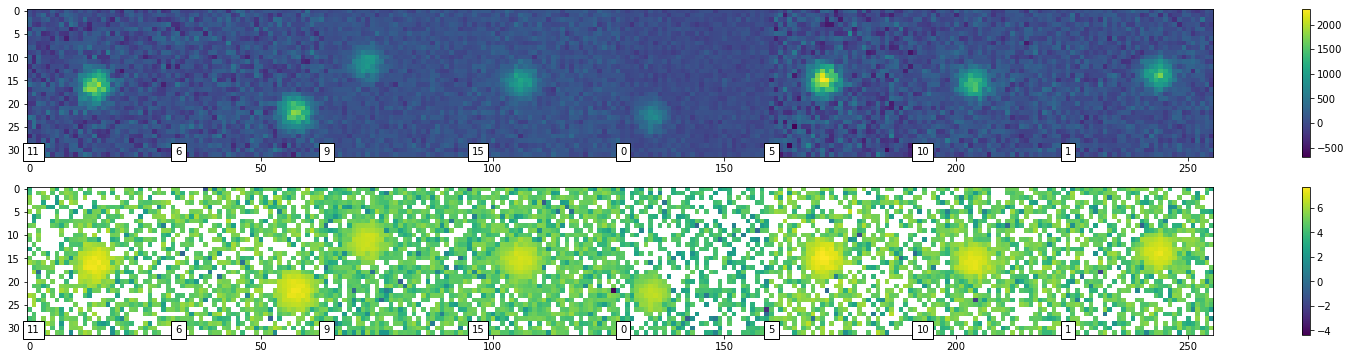

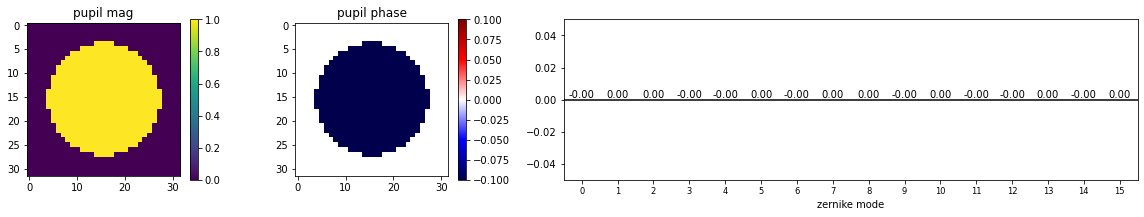

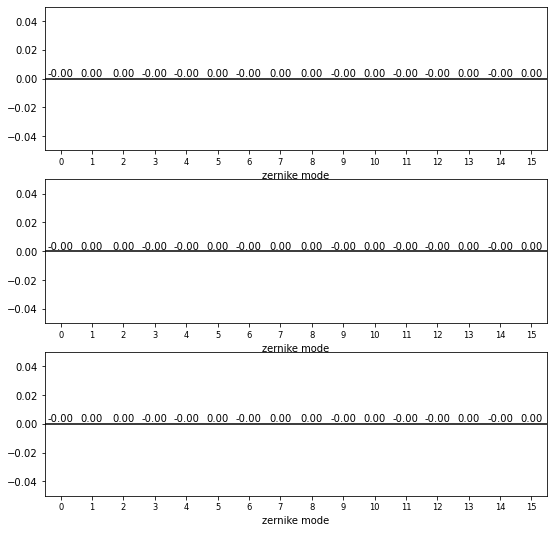

In [3]:
reload(dataset)
import zernike
reload(zernike)

a = dataset.FourierOpticsPSFDataset(length=16,
                                    out_size=(32,32),
                                    psf_zerns={0:0},#, 1:1, 2:0.2, 4:1, 5:2, 7:-2, 9:3},
                                    noise_params={},
                                    augmentations={dataset.Augmentation.NOISE_GAUSSIAN:0.1},
                                    normalize=False) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
# print(a.kx)



import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 1, figsize=(9, 9))
zernike.plot_zernike_coeffs(axes[0], zernike.fit_zernike_from_pupil(a.pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

correction = zernike.compensate_tip_tilt(np.angle(a.pupil), np.abs(a.pupil) <=0)
corrected_pupil = np.abs(a.pupil) * np.exp(1j * correction)
zernike.plot_zernike_coeffs(axes[1], zernike.fit_zernike_from_pupil(corrected_pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

correction = zernike.compensate_tip_tilt(np.angle(corrected_pupil), np.abs(corrected_pupil) <=0)
corrected_pupil = np.abs(corrected_pupil) * np.exp(1j * correction)
zernike.plot_zernike_coeffs(axes[2], zernike.fit_zernike_from_pupil(corrected_pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

3:	 [id = 3.000,], [x = -9.822,], [y = -3.445,], [A = 1868.372,], [bg = 18.660,],
8:	 [id = 8.000,], [x = -5.177,], [y = -5.333,], [A = 724.340,], [bg = 96.954,],
7:	 [id = 7.000,], [x = 1.284,], [y = -5.694,], [A = 1543.892,], [bg = 1.550,],
2:	 [id = 2.000,], [x = 5.320,], [y = 4.384,], [A = 1867.729,], [bg = 2.929,],
14:	 [id = 14.000,], [x = 2.435,], [y = -9.874,], [A = 1912.984,], [bg = 51.622,],
1:	 [id = 1.000,], [x = -1.696,], [y = -1.426,], [A = 1514.961,], [bg = 49.834,],
13:	 [id = 13.000,], [x = -5.286,], [y = -7.952,], [A = 720.133,], [bg = 50.896,],
15:	 [id = 15.000,], [x = 1.916,], [y = 3.615,], [A = 949.167,], [bg = 76.162,],


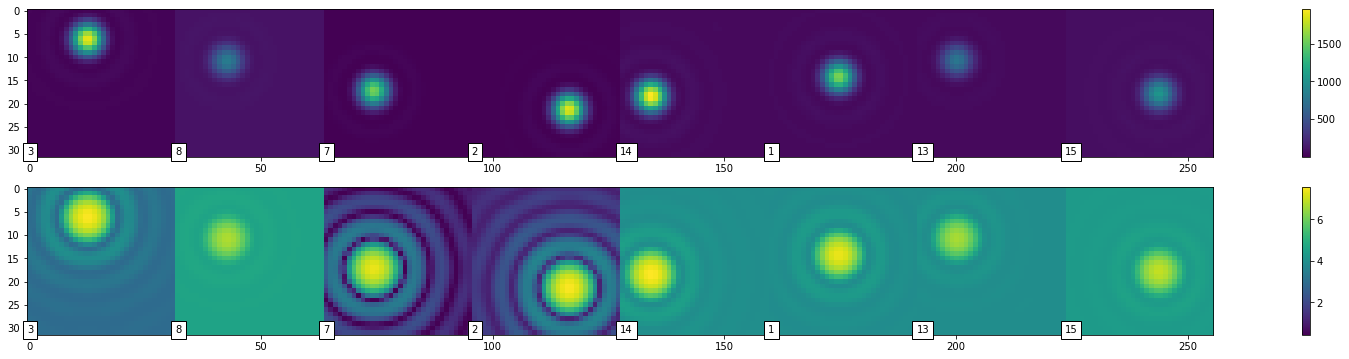

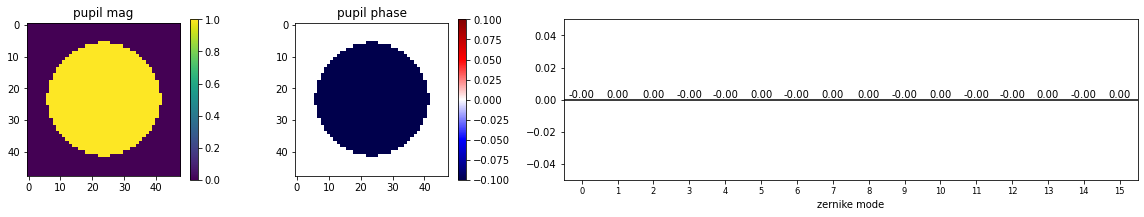

In [4]:
reload(dataset)

a = dataset.FourierOptics2DPSFDataset(length=16,
                                      # psf_zerns={1:0, 5:2},
                                      noise_params={},
                                      normalize=False,
                                     # psf_params={'pupil_scale':1},
                                     ) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
# print(a.kx)

4:	 [id = 4.000,], [x = -2.404,], [y = 0.926,], [z = -5.355,], [A = 800.734,], [bg = 20.007,],
6:	 [id = 6.000,], [x = 3.153,], [y = 6.229,], [z = -5.133,], [A = 964.069,], [bg = 47.306,],
15:	 [id = 15.000,], [x = -7.629,], [y = 14.662,], [z = -5.911,], [A = 1272.746,], [bg = 41.346,],
8:	 [id = 8.000,], [x = -6.763,], [y = -0.046,], [z = 8.327,], [A = 1058.398,], [bg = 93.383,],
12:	 [id = 12.000,], [x = -3.770,], [y = 3.675,], [z = 9.711,], [A = 1428.177,], [bg = 78.433,],
9:	 [id = 9.000,], [x = -3.740,], [y = -6.208,], [z = 9.521,], [A = 1118.400,], [bg = 24.811,],
13:	 [id = 13.000,], [x = 9.883,], [y = 1.019,], [z = -4.259,], [A = 1700.439,], [bg = 9.525,],
14:	 [id = 14.000,], [x = -7.563,], [y = -3.430,], [z = 5.920,], [A = 1108.193,], [bg = 61.117,],


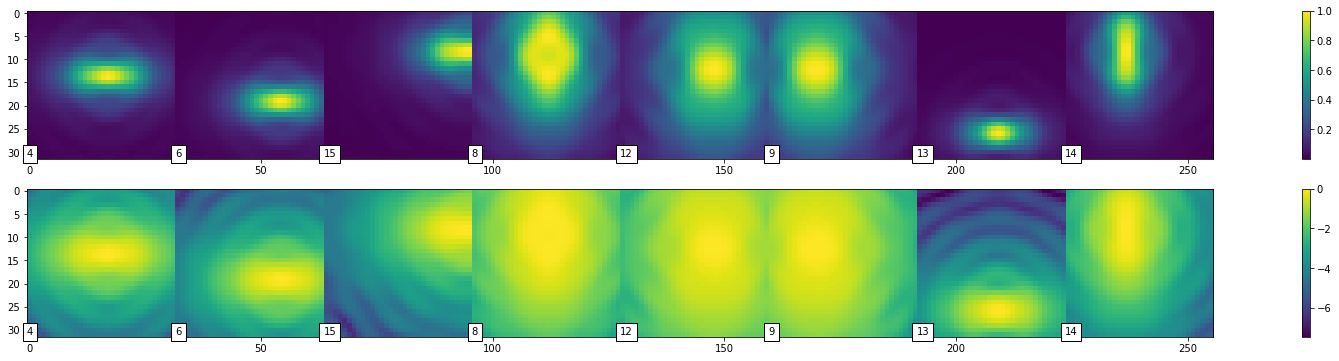

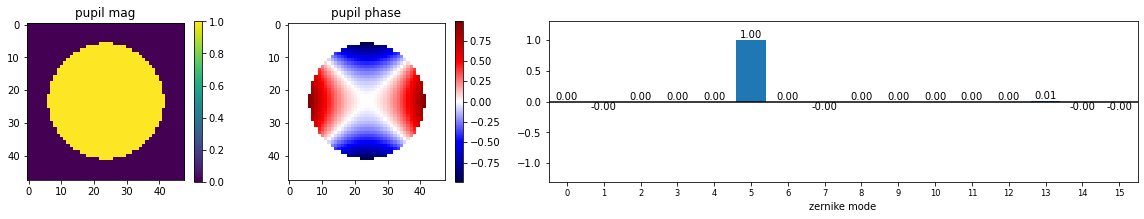

In [5]:
reload(dataset)

a = dataset.FourierOptics3DPSFDataset(length=16, psf_zerns={1:0, 5:1}, noise_params={}) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)

14:	 [id = 14.000,], [x = 3.025, 9.671, 8.431, 3.795, -5.261, -5.460, 11.070, 14.835,], [y = 2.945, 1.406, 10.081, 13.243, 4.869, 6.883, 0.671, -2.017,], [sig_x = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [sig_y = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [A = 596.600, 926.392, 779.182, 728.067, 1944.193, 992.739, 1715.624, 1183.691,], [bg = 15.729,],
6:	 [id = 6.000,], [x = -6.778, 1.796, -4.965, -9.609, -6.005, 0.369, 19.679, 15.194,], [y = -8.761, -11.723, 6.977, 7.147, -8.923, -18.686, -3.131, -8.565,], [sig_x = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [sig_y = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [A = 1429.698, 1846.551, 799.703, 1068.017, 787.554, 1184.317, 1988.364, 1752.309,], [bg = 54.436,],
5:	 [id = 5.000,], [x = -2.471, -12.837, -1.011, -0.755, -10.568, -23.813, 7.553, -11.360,], [y = 8.036, 15.823, -12.119, -6.632, 19.814, -1.385, 4.933, -7.792,], [sig_x = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,

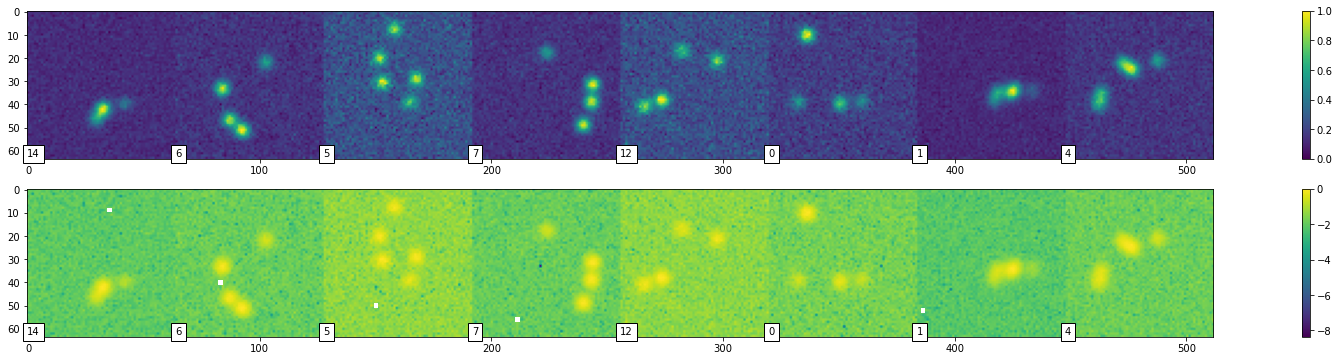

In [6]:
reload(dataset)

a = dataset.Gaussian2DPSFDataset(out_size=(64, 64), length=(16,8), dropout_p=0.5, )
dataset.inspect_images(a)

2:	 [id = 2.000,], [x = -5.338, -12.363, -10.394, 9.916, -1.315, -18.466, -0.201, -13.559,], [y = -4.569, 11.402, 7.856, -18.799, -14.674, -16.985, -15.212, -12.870,], [z = 1.592, -2.417, 3.346, -9.602, 3.876, 0.129, 9.093, 4.491,], [A = 1365.421, 1201.564, 1718.118, 1464.381, 1061.869, 1319.836, 912.510, 1371.449,], [bg = 14.744,],
3:	 [id = 3.000,], [x = 3.842, 21.499, 13.615, 0.974, 19.502, 5.433, -8.078, 16.319,], [y = -19.224, 2.288, -1.554, -0.826, 8.886, -15.328, 3.526, 5.005,], [z = -7.776, -8.633, -7.267, 3.262, 7.490, -0.291, -2.709, 4.895,], [A = 651.141, 631.787, 1560.703, 1137.462, 1698.051, 784.934, 670.477, 715.187,], [bg = 93.195,],
1:	 [id = 1.000,], [x = 4.840, 7.659, 4.414, -7.123, 9.952, 8.025, -13.957, 18.006,], [y = 8.506, 15.805, 3.952, -1.745, -11.207, 7.030, -13.305, 9.964,], [z = -5.313, -9.296, -1.391, -6.944, 6.723, 3.374, 3.462, 3.045,], [A = 1368.458, 839.953, 865.126, 805.429, 1793.267, 1492.633, 1567.058, 1769.992,], [bg = 75.665,],
15:	 [id = 15.000,], 

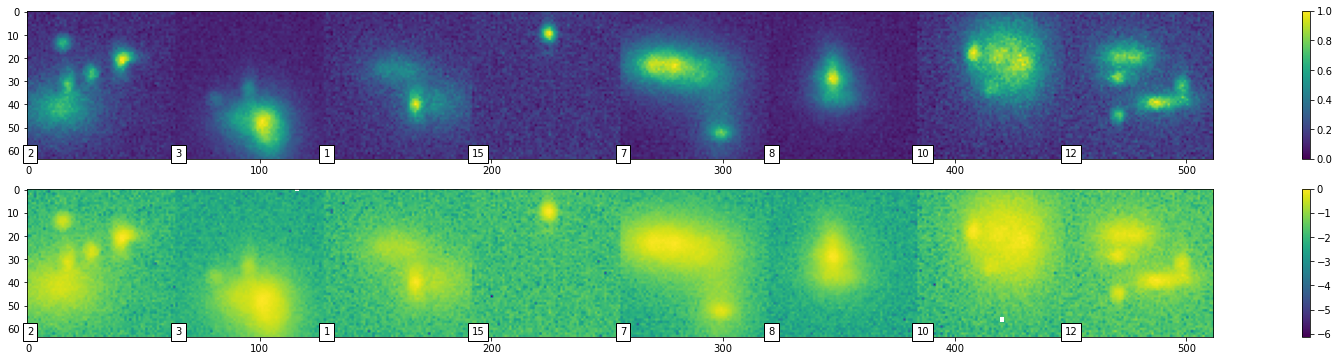

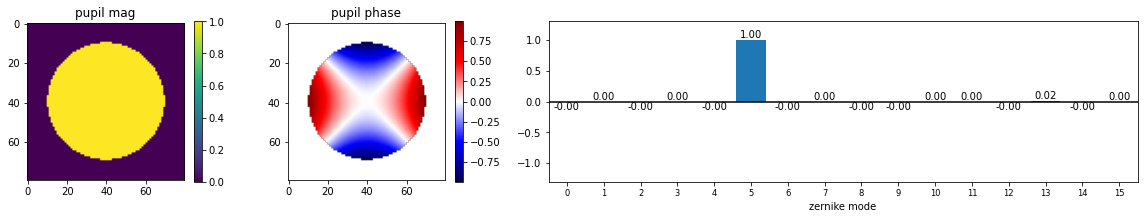

In [7]:
reload(dataset)

a = dataset.FourierOptics3DPSFDataset(out_size=(64, 64), length=(16,8), dropout_p=0.5, psf_zerns={1:0, 5:1}, ) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
print(a.params.keys())
for key, val in a.params.items():
    print(val.shape)

2:	 [x = -2.269,], [y = -1.831,],
3:	 [x = 2.323,], [y = -1.109,],
6:	 [x = 0.071,], [y = -3.382,],
4:	 [x = -3.475,], [y = -2.675,],
7:	 [x = 4.357,], [y = -4.743,],
5:	 [x = 2.748,], [y = 4.046,],
0:	 [x = -1.361,], [y = -3.615,],
1:	 [x = -1.845,], [y = -1.545,],


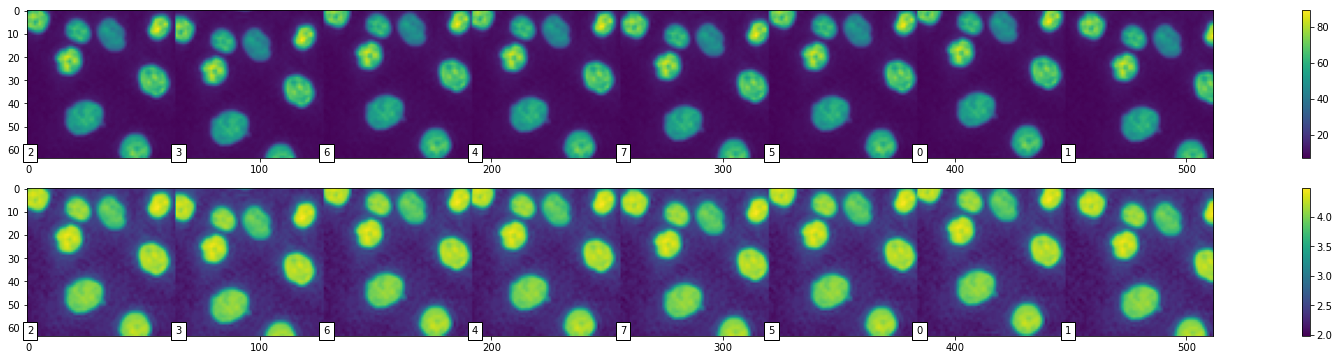

In [8]:
reload(dataset)

a = dataset.SingleImageDataset(skimage.data.human_mitosis()[20:, 20:], out_size=(64,64), length=8,
                               img_params={'shifts':[5, 5],
                                           # 'conv':np.ones((3,3)),
                                          },
                               noise_params={}, augmentations={}, normalize=False)
dataset.inspect_images(a)